<a href="https://colab.research.google.com/github/krishnaaxo/Ozone_depletion_detection_using_AI/blob/main/Ozone_Detection_Using_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


**Import Data**

In [2]:
df = pd.read_csv('eighthr.csv')
data=df.copy(deep=True)

# **Data Preprocessing**

In [3]:
data.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.58,0


In [4]:
df.head().T

,0,1,2,3,4
Date,1/1/1998,1/2/1998,1/3/1998,1/4/1998,1/5/1998
WSR0,0.8,2.8,2.9,4.7,2.6
WSR1,1.8,3.2,2.8,3.8,2.1
WSR2,2.4,3.3,2.6,3.7,1.6
WSR3,2.1,2.7,2.1,3.8,1.4
...,...,...,...,...,...
TT,17.9,29,41.3,51.7,?
SLP,10330,10275,10235,10195,?
SLP_,-55,-55,-40,-40,?
Precp,0,0,0,2.08,0.58


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2534 non-null   object
 1   WSR0    2534 non-null   object
 2   WSR1    2534 non-null   object
 3   WSR2    2534 non-null   object
 4   WSR3    2534 non-null   object
 5   WSR4    2534 non-null   object
 6   WSR5    2534 non-null   object
 7   WSR6    2534 non-null   object
 8   WSR7    2534 non-null   object
 9   WSR8    2534 non-null   object
 10  WSR9    2534 non-null   object
 11  WSR10   2534 non-null   object
 12  WSR11   2534 non-null   object
 13  WSR12   2534 non-null   object
 14  WSR13   2534 non-null   object
 15  WSR14   2534 non-null   object
 16  WSR15   2534 non-null   object
 17  WSR16   2534 non-null   object
 18  WSR17   2534 non-null   object
 19  WSR18   2534 non-null   object
 20  WSR19   2534 non-null   object
 21  WSR20   2534 non-null   object
 22  WSR21   2534 non-null   

In [6]:
for i in df.columns:
    df[i]=df[i].replace(["?"],np.nan)

In [7]:
df.isna().sum()


Date        0
WSR0      299
WSR1      292
WSR2      294
WSR3      292
         ... 
TT        125
SLP        95
SLP_      158
Precp       2
Result      0
Length: 74, dtype: int64

In [8]:
del df['Date']

In [9]:
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


**Checking Missing values**

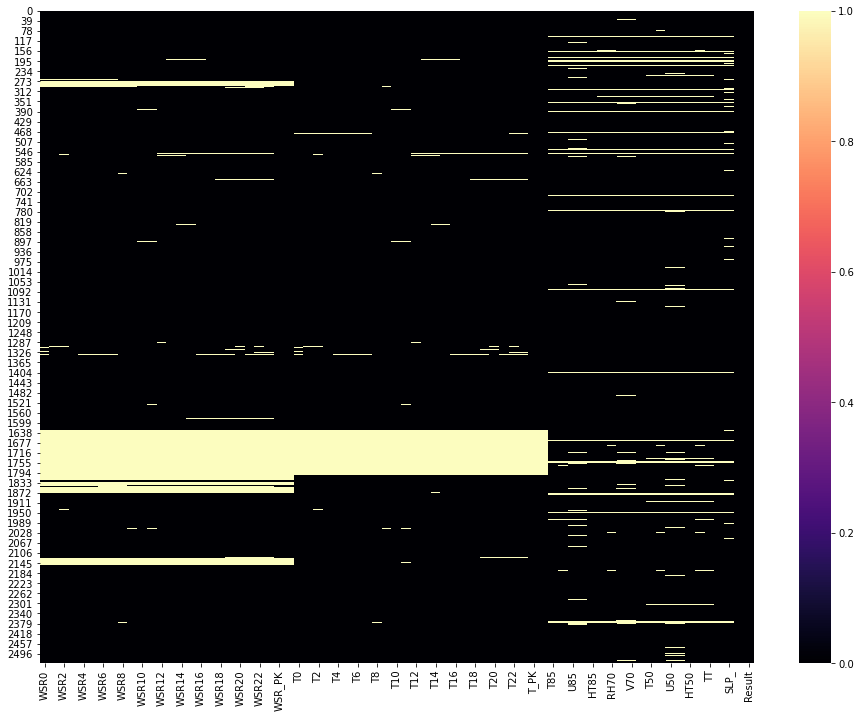

In [10]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

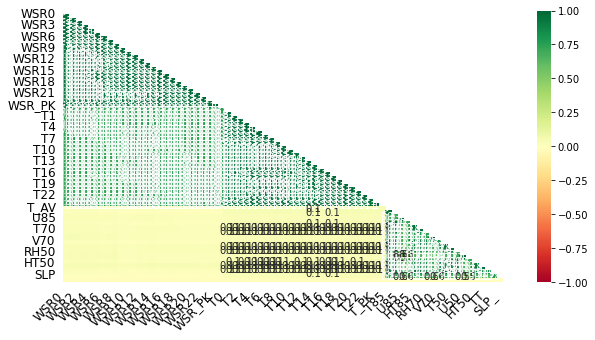

In [11]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

**Filling missing Values**

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [13]:
c=df.columns
c

Index(['WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7', 'WSR8',
       'WSR9', 'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15', 'WSR16',
       'WSR17', 'WSR18', 'WSR19', 'WSR20', 'WSR21', 'WSR22', 'WSR23', 'WSR_PK',
       'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9',
       'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19',
       'T20', 'T21', 'T22', 'T23', 'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85',
       'HT85', 'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50',
       'V50', 'HT50', 'KI', 'TT', 'SLP', 'SLP_', 'Precp', 'Result'],
      dtype='object')

In [14]:
df = pd.DataFrame(imputer.fit_transform(df), dtype='float64')
df.columns = c
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0,19.1,12.5,6.700000,0.11000,3.830000,0.140000,1612.00000,-2.300000,0.300000,7.180000,0.120000,3178.500000,-15.50000,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3.0,2.6,3.0,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2,22.4,17.8,9.000000,0.25000,-0.410000,9.530000,1594.50000,-2.200000,0.960000,8.240000,7.300000,3172.000000,-14.50000,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4.0,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22.0,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4,22.2,18.7,9.000000,0.56000,0.890000,10.170000,1568.50000,0.900000,0.540000,3.800000,4.420000,3160.000000,-15.90000,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19.0,19.0,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.900000,0.89000,-0.340000,8.580000,1546.50000,3.000000,0.770000,4.170000,8.110000,3145.500000,-16.80000,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2.0,3.0,3.0,3.1,3.1,2.7,3.0,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26.0,25.6,24.2,22.9,21.6,20.0,19.5,19.1,19.1,26.0,21.1,13.575298,0.57732,2.136487,1.662464,1531.49426,5.931129,0.406445,5.459634,0.994001,3145.420501,-10.51141,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,0.0


**After filling the missing Data**

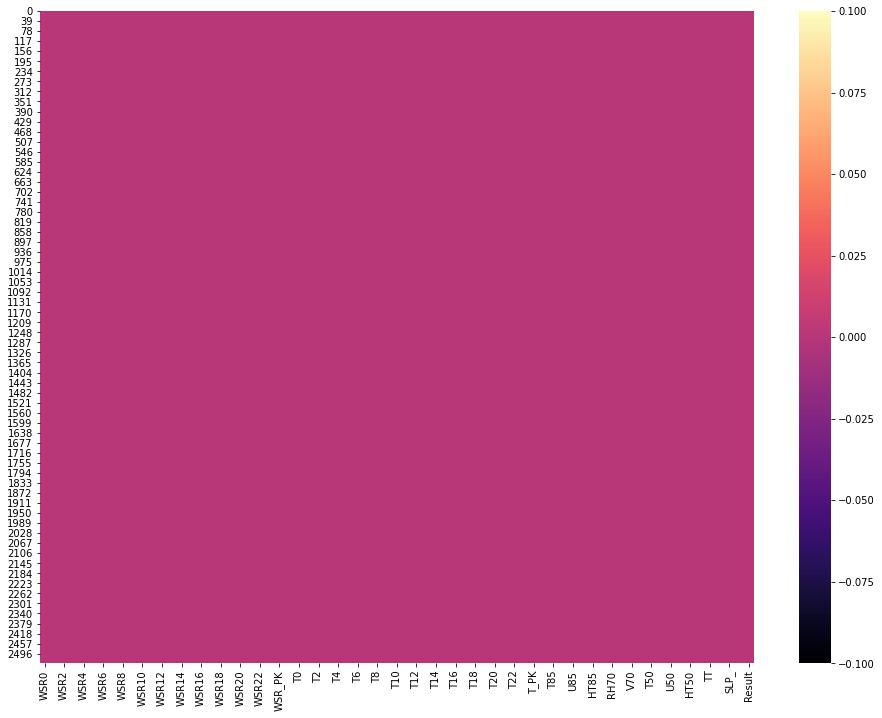

In [15]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WSR0    2534 non-null   float64
 1   WSR1    2534 non-null   float64
 2   WSR2    2534 non-null   float64
 3   WSR3    2534 non-null   float64
 4   WSR4    2534 non-null   float64
 5   WSR5    2534 non-null   float64
 6   WSR6    2534 non-null   float64
 7   WSR7    2534 non-null   float64
 8   WSR8    2534 non-null   float64
 9   WSR9    2534 non-null   float64
 10  WSR10   2534 non-null   float64
 11  WSR11   2534 non-null   float64
 12  WSR12   2534 non-null   float64
 13  WSR13   2534 non-null   float64
 14  WSR14   2534 non-null   float64
 15  WSR15   2534 non-null   float64
 16  WSR16   2534 non-null   float64
 17  WSR17   2534 non-null   float64
 18  WSR18   2534 non-null   float64
 19  WSR19   2534 non-null   float64
 20  WSR20   2534 non-null   float64
 21  WSR21   2534 non-null   float64
 22  

In [17]:
df.describe()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.00000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.00000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,1.640179,1.586351,1.545580,1.526405,1.522624,1.542417,1.637896,2.047127,2.539037,2.847708,2.969768,3.016414,3.044148,3.106679,3.177738,3.231005,3.19280,2.934562,2.561343,2.285638,2.089554,1.938376,1.803805,1.708538,4.172092,2.314949,18.649275,18.34785,18.060886,17.821319,17.611319,17.475542,17.589366,18.417822,19.778799,21.216943,22.462532,23.393553,24.025245,24.433077,24.705081,24.720153,24.397532,23.632100,22.509702,21.425661,20.615352,20.031588,19.502647,19.062260,25.578338,20.840483,13.575298,0.577320,2.136487,1.662464,1531.494260,5.931129,0.406445,5.459634,0.994001,3145.420501,-10.511410,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.372026,0.063141
std,1.194568,1.191320,1.165651,1.133908,1.127523,1.102557,1.092811,1.092315,1.115448,1.150067,1.226213,1.304019,1.335290,1.355860,1.339908,1.292098,1.20807,1.163749,1.167420,1.141466,1.133256,1.136367,1.157232,1.186339,1.108616,0.871756,6.752344,6.82283,6.884705,6.938420,6.985407,7.043085,7.241698,7.582168,7.585859,7.469895,7.402258,7.333411,7.273891,7.178587,7.099197,7.028064,6.968902,6.916727,6.824704,6.661610,6.604597,6.608696,6.634095,6.696116,6.900412,6.766376,4.777721,0.252778,4.554302,5.911862,35.999852,3.784369,0.261882,6.465907,5.990767,48.194639,3.793266,0.242858,9.127381,7.043762,77.410110,20.154266,10.949074,51.428116,34.693349,1.317438,0.243265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.20000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.400000,-1.800000,-2.10000,-2.600000,-2.800000,-3.200000,-3.600000,-3.200000,-2.800000,-1.900000,-1.200000,-1.200000,-0.300000,0.300000,0.900000,1.500000,1.700000,0.600000,-0.600000,-0.200000,0.100000,0.200000,-0.300000,-1.400000,-1.200000,1.700000,0.300000,-7.100000,0.010000,-15.770000,-18.100000,1351.000000,-9.900000,0.010000,-14.370000,-23.680000,2919.000000,-24.800000,0.010000,-14.920000,-25.990000,5480.000000,-56.700000,-10.100000,9975.000000,-135.000000,0.000000,0.000000
25%,0.800000,0.700000,0.700000,0.700000,0.700000,0.700000,0.800000,1.300000,1.800000,2.100000,2.100000,2.100000,2.100000,2.100000,2.200000,2.400000,2.40000,2.100000,1.800000,1.500000,1.300000,1.200000,1.000000,0.800000,3.400000,1.700000,14.025000,13.72500,13.300000,13.200000,12.900000,12.600000,12.525000,13.300000,14.800000,16.500000,17.900000,19.000000,19.900000,20.300000,20.725000,20.900000,20.400000,19.700000,18.400000,17.400000,16.500000,15.700000,15.025000,14.600000,21.700000,16.500000,10.700000,0.400000,-0.757500,-2.080000,1512.000000,3.625000,0.172500,0.932500,-2.470000,3118.125000,-13.200000,0.100000,3.130000,-3.340000,5771.250000,-2.437500,33.200000,10130.000000,-20.000000,0.000000

**Looking for Columns having similar values**

In [18]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [19]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [20]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]

print(len(constant_columns))

0


**No such columns found**

In [21]:
df.shape

(2534, 73)

**Looking for duplicate values**

In [22]:
df.duplicated(keep=False).sum()

9

In [23]:
df=df.drop_duplicates()

In [24]:
df.duplicated(keep=False).sum()

0

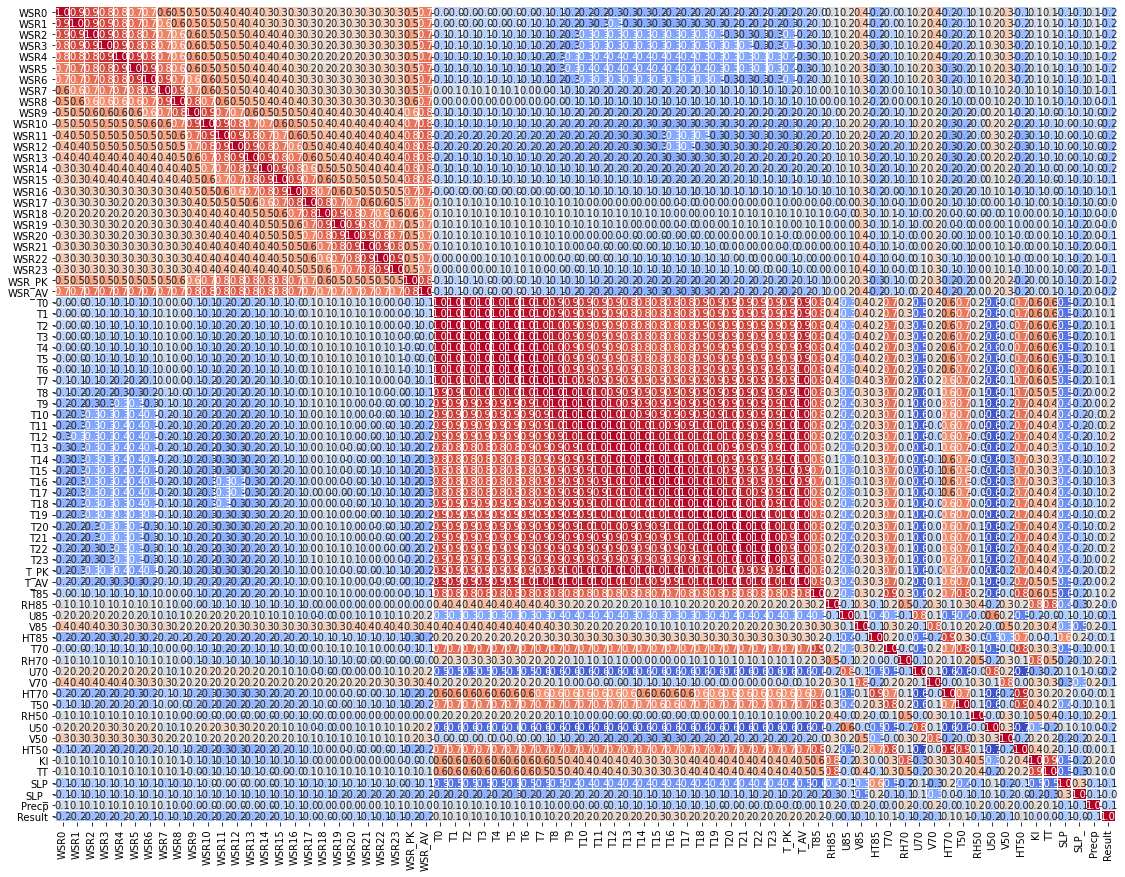

In [25]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(19,15))
sns.heatmap(df.corr(), annot=True, fmt='.1f', linewidth=0.2, cbar=False, cmap='coolwarm');

In [26]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(df, 0.9)
len(set(corr_features))

34

In [28]:
corr_features

{'HT50',
 'T1',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16',
 'T17',
 'T18',
 'T19',
 'T2',
 'T20',
 'T21',
 'T22',
 'T23',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T_AV',
 'T_PK',
 'WSR1',
 'WSR2',
 'WSR22',
 'WSR23',
 'WSR3',
 'WSR4',
 'WSR5',
 'WSR6'}

In [29]:
df=df.drop(corr_features,axis=1)

In [30]:
df.shape

(2526, 39)

**Getting rid of outliers** 

In [31]:
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (df[col].max()<=1) & (df[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=df.drop(['Result'],axis=1))
non_fraction_columns = df.drop(['Result'],axis=1).columns.difference(fractional_columns)
print("# Fraction-only Columns",len(fractional_columns),"\t","# Other than Fraction-only Columns", len(non_fraction_columns))

# Fraction-only Columns 3 	 # Other than Fraction-only Columns 35


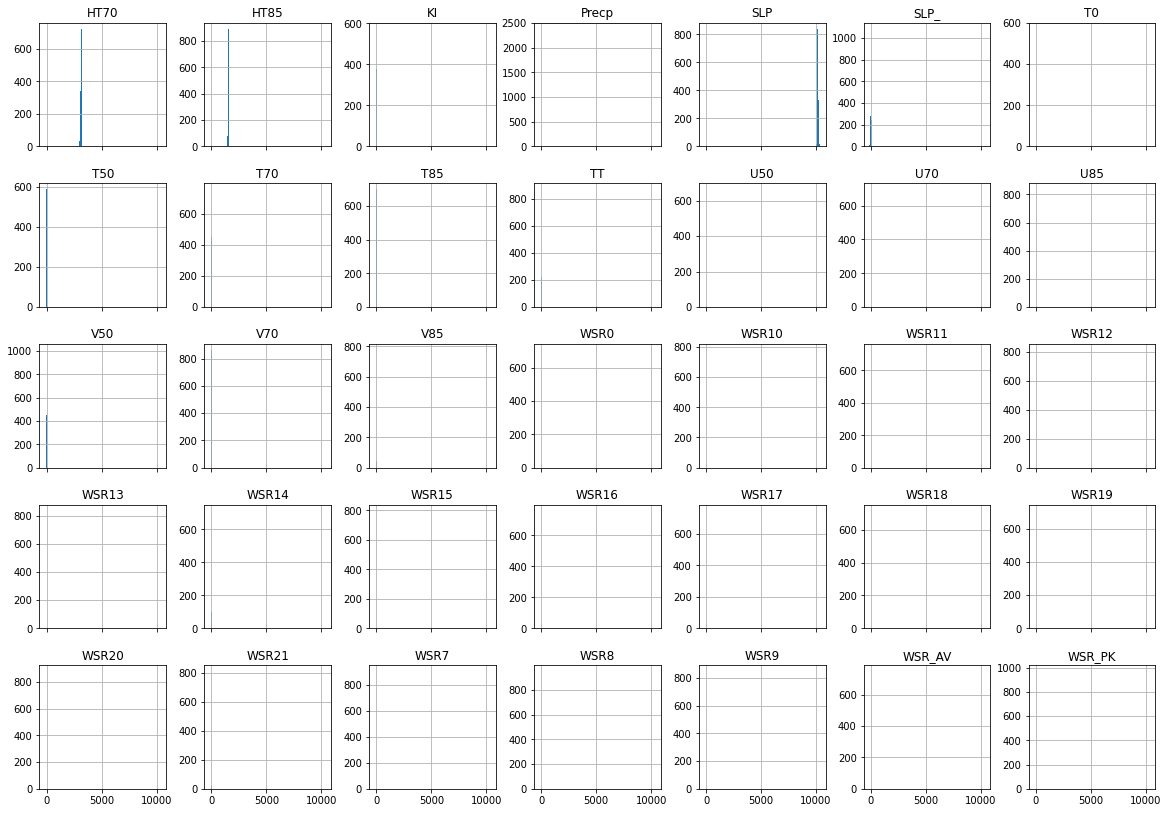

In [32]:
df[non_fraction_columns].hist(figsize= (20,20),sharex=True,layout= (7,7))
plt.show()

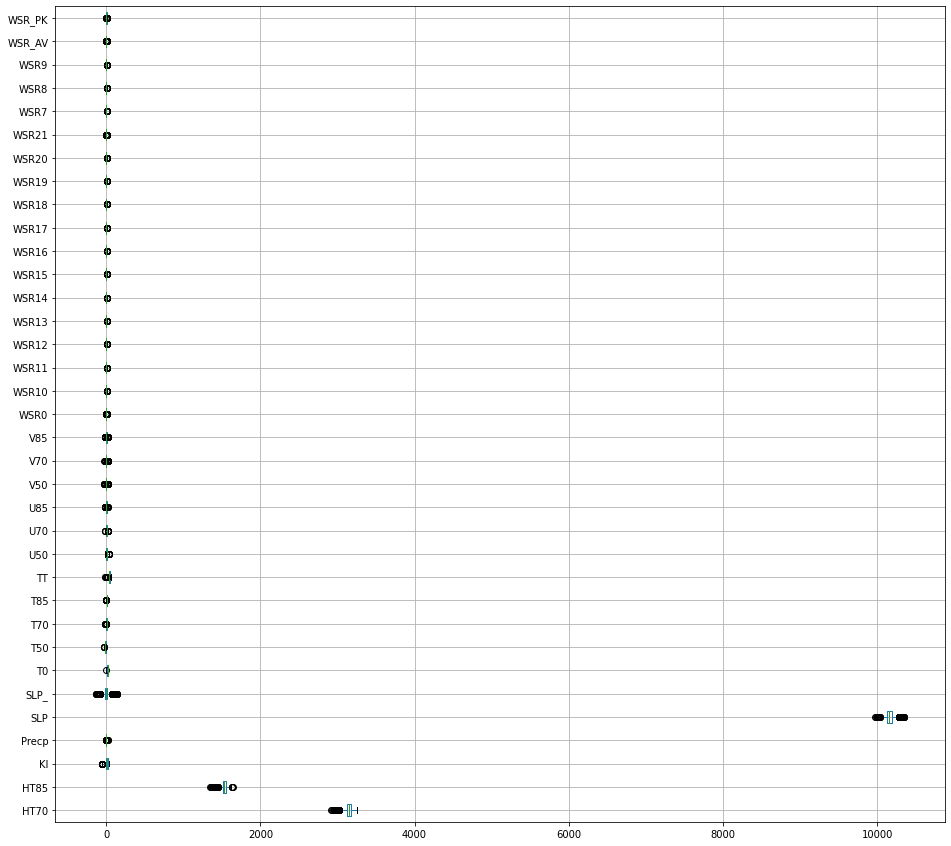

In [33]:
df[non_fraction_columns].boxplot(vert=False,figsize= (19,15))
plt.subplots_adjust(left=0.25)
plt.show()

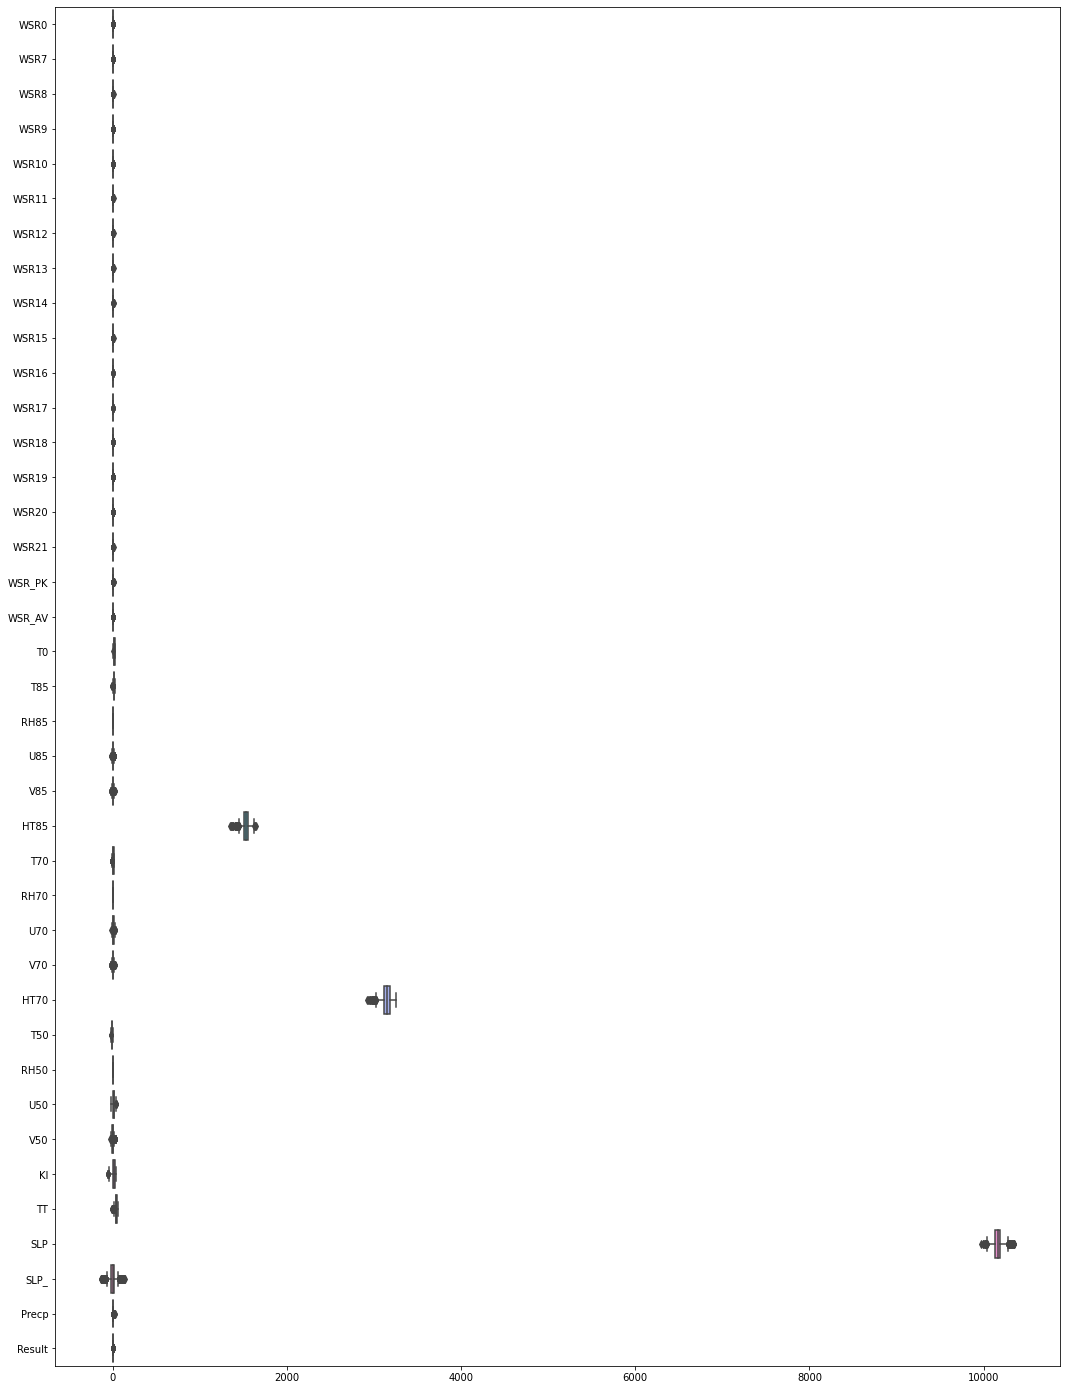

In [34]:
plt.figure(figsize=(18,25))
sns.boxplot(data=df, orient="h");

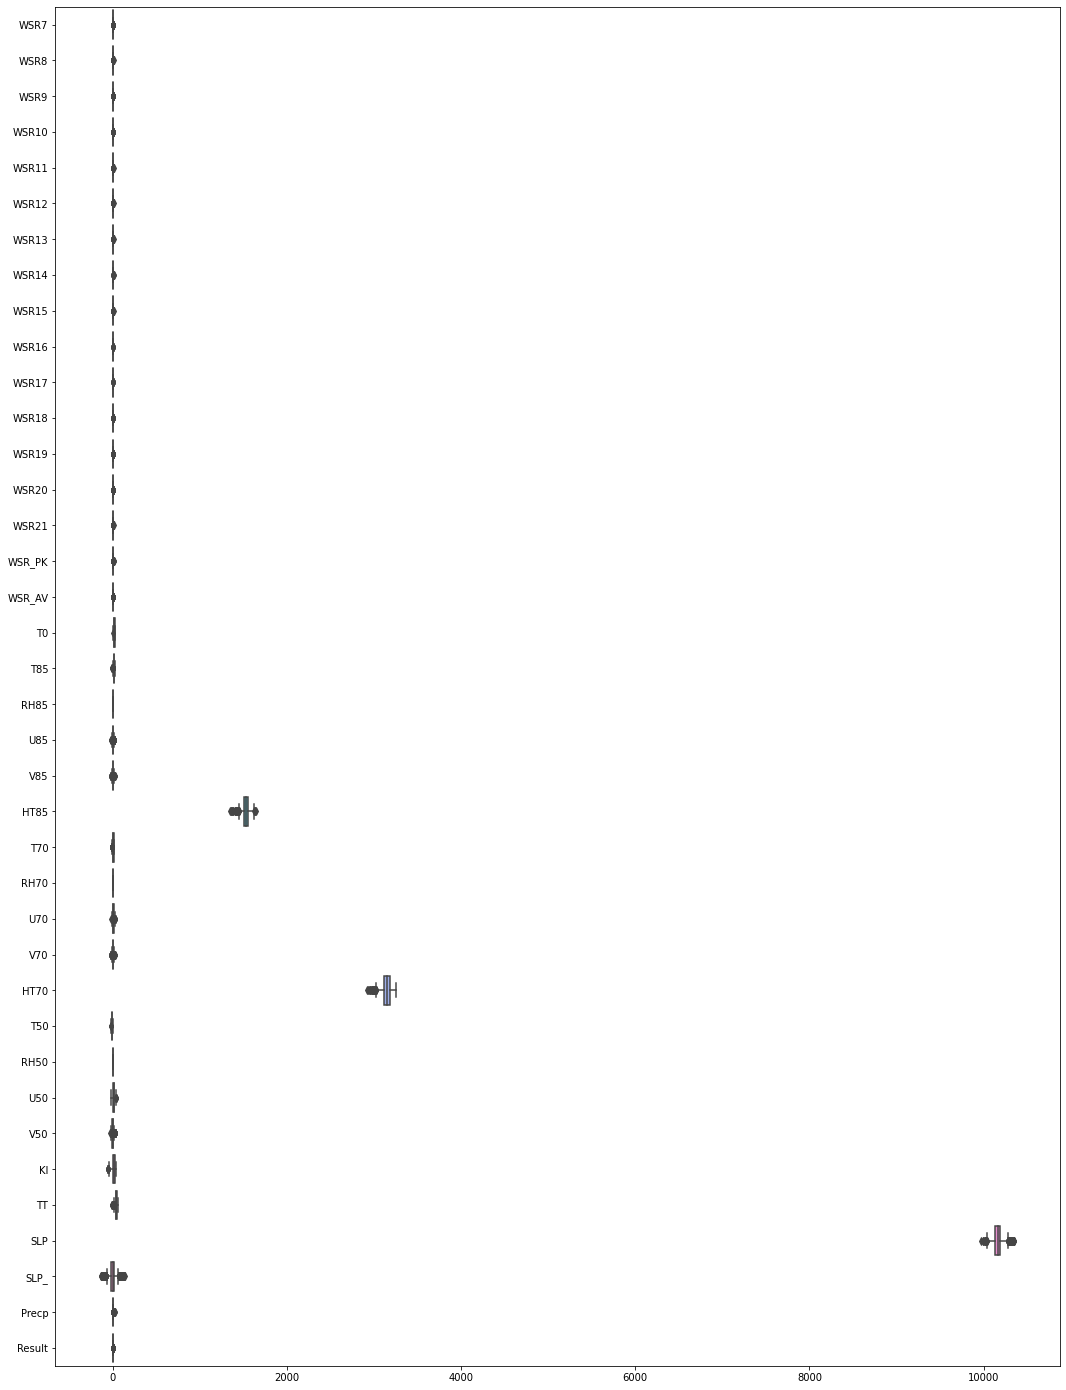

In [35]:
plt.figure(figsize=(18,25))
sns.boxplot(data=df.iloc[:,1:], orient="h");

In [36]:
log_transformed_cols = []
for col in df[non_fraction_columns].columns:
    if (df[col].quantile(1) >= 100* df[col].quantile(0.99)) |  (sum(df[col] > df[col].quantile(0.99)) <= 10):
        df[col] = np.log1p(df[col])
        log_transformed_cols.append(col)
        
## Change names of log transformed column
log_names = "log_" + df[log_transformed_cols].columns
df.rename(columns={df[log_transformed_cols].columns[i]: log_names[i] for i in range(len(log_names))}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


The following features are log transformed after they fulfill outlier detection condition. 

 ['T50']


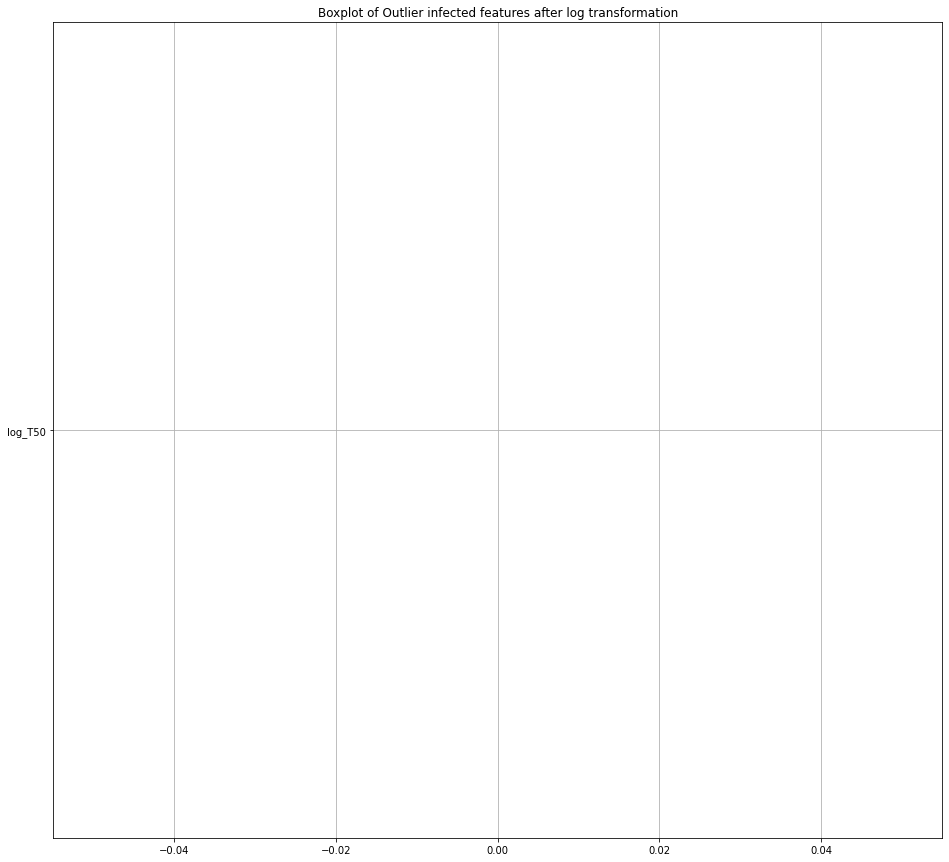

In [37]:
print("The following features are log transformed after they fulfill outlier detection condition.","\n\n",log_transformed_cols)
df[log_names].boxplot(vert=False,figsize= (19,15))
plt.subplots_adjust(left=0.25)
plt.title("Boxplot of Outlier infected features after log transformation")
plt.show()

In [38]:
del df['log_T50']

 **Checking the imbalance dataset**

In [39]:
df1 = pd.DataFrame(df.Result.value_counts())
df2 = pd.DataFrame(100*df.Result.value_counts(normalize=True).astype(float))
tab = df1.merge(df2,left_index=True,right_index=True).rename(columns = {"Bankrupt_x" : "Count" , "Bankrupt_y" : "Percentage"})
print(tab)

     Result_x   Result_y
0.0      2366  93.665875
1.0       160   6.334125


([<matplotlib.patches.Wedge at 0x7efe539dd750>,
 [Text(-1.0782929181504237, 0.2174497244575028, '0'),
  Text(1.0782929537788561, -0.21744954778262895, '1')])

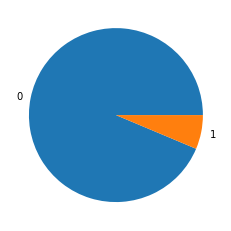

In [40]:
plt.pie(tab['Result_y'], labels= [0,1])

In [41]:
X=df.drop(labels=['Result'], axis=1)
y=df['Result']

In [42]:
X

,WSR0,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR_PK,WSR_AV,T0,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,RH50,U50,V50,KI,TT,SLP,SLP_,Precp
0,0.8,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,5.5,3.1,5.2,6.700000,0.11000,3.830000,0.140000,1612.00000,-2.300000,0.300000,7.180000,0.120000,3178.500000,0.150000,10.670000,-1.560000,-12.100000,17.900000,10330.000000,-55.000000,0.00
1,2.8,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3.0,2.6,3.0,2.2,2.3,5.5,3.4,15.1,9.000000,0.25000,-0.410000,9.530000,1594.50000,-2.200000,0.960000,8.240000,7.300000,3172.000000,0.480000,8.390000,3.840000,14.050000,29.000000,10275.000000,-55.000000,0.00
2,2.9,2.7,2.2,2.5,3.1,4.0,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,5.6,3.5,16.6,9.000000,0.56000,0.890000,10.170000,1568.50000,0.900000,0.540000,3.800000,4.420000,3160.000000,0.600000,6.940000,9.800000,17.900000,41.300000,10235.000000,-40.000000,0.00
3,4.7,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.7,3.2,18.3,9.900000,0.89000,-0.340000,8.580000,1546.50000,3.000000,0.770000,4.170000,8.110000,3145.500000,0.490000,8.730000,10.540000,31.150000,51.700000,10195.000000,-40.000000,2.08
4,2.6,1.4,1.3,1.4,2.2,2.0,3.0,3.0,3.1,3.1,2.7,3.0,2.4,2.8,2.5,2.5,3.7,2.3,18.8,13.575298,0.57732,2.136487,1.662464,1531.49426,5.931129,0.406445,5.459634,0.994001,3145.420501,0.304716,9.872418,0.830116,10.511051,37.388335,10164.198442,-0.119949,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,1.3,2.2,2.8,2.8,2.8,3.4,3.9,3.8,3.5,2.0,1.7,1.5,1.3,1.3,3.9,1.6,2.8,5.500000,0.33000,-2.250000,-1.920000,1576.00000,3.200000,0.060000,0.010000,-3.500000,3153.500000,0.070000,7.930000,-4.410000,-25.600000,21.800000,10295.000000,65.000000,0.00
2530,1.0,1.5,2.1,2.4,4.2,4.6,4.2,4.8,5.0,4.7,3.7,3.6,2.7,3.1,2.1,1.8,5.0,2.6,7.0,5.800000,0.27000,-2.450000,4.710000,1600.50000,3.400000,0.100000,0.970000,1.860000,3189.000000,0.040000,5.950000,-1.140000,-19.400000,19.100000,10310.000000,15.000000,0.00
2531,0.8,1.1,1.5,1.5,2.9,3.3,3.7,3.9,3.6,3.7,3.3,3.0,2.3,1.3,1.2,0.8,3.9,1.9,15.3,7.500000,0.79000,7.570000,3.130000,1591.00000,4.600000,0.060000,3.020000,2.240000,3181.000000,0.060000,7.800000,-0.640000,-9.600000,35.200000,10275.000000,-35.000000,0.00
2532,1.3,1.0,1.9,2.0,2.5,2.1,2.5,3.6,3.9,4.0,3.6,3.1,3.2,2.3,1.8,1.7,4.0,2.1,18.1,9.300000,0.66000,0.850000,9.760000,1581.50000,6.700000,0.020000,1.100000,3.400000,3170.500000,0.250000,7.720000,-0.890000,-19.600000,34.200000,10245.000000,-30.000000,0.05


In [43]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2529    0.0
2530    0.0
2531    0.0
2532    0.0
2533    0.0
Name: Result, Length: 2526, dtype: float64

In [44]:
cX=X.columns
cX

Index(['WSR0', 'WSR7', 'WSR8', 'WSR9', 'WSR10', 'WSR11', 'WSR12', 'WSR13',
       'WSR14', 'WSR15', 'WSR16', 'WSR17', 'WSR18', 'WSR19', 'WSR20', 'WSR21',
       'WSR_PK', 'WSR_AV', 'T0', 'T85', 'RH85', 'U85', 'V85', 'HT85', 'T70',
       'RH70', 'U70', 'V70', 'HT70', 'RH50', 'U50', 'V50', 'KI', 'TT', 'SLP',
       'SLP_', 'Precp'],
      dtype='object')

**Balancing Dataset**

In [45]:
from imblearn.combine import SMOTETomek
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [46]:

os=SMOTETomek(0.75)
X,y=os.fit_sample(X,y)
print("The number of classes After fit {}".format(Counter(y)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes After fit Counter({0.0: 2360, 1.0: 1768})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [47]:
X = pd.DataFrame(X, columns = cX)

In [48]:
y = pd.DataFrame(y, columns = ['Result'])

In [49]:
X

,WSR0,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR_PK,WSR_AV,T0,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,RH50,U50,V50,KI,TT,SLP,SLP_,Precp
0,0.800000,1.700000,1.900000,2.300000,3.700000,5.500000,5.100000,5.400000,5.400000,4.700000,4.300000,3.500000,3.500000,2.900000,3.200000,3.200000,5.500000,3.100000,5.200000,6.700000,0.110000,3.830000,0.140000,1612.000000,-2.300000,0.300000,7.180000,0.120000,3178.500000,0.150000,10.670000,-1.560000,-12.100000,17.900000,10330.000000,-55.000000,0.00
1,2.800000,2.800000,3.100000,3.400000,4.200000,4.500000,4.500000,4.300000,5.500000,5.100000,3.800000,3.000000,2.600000,3.000000,2.200000,2.300000,5.500000,3.400000,15.100000,9.000000,0.250000,-0.410000,9.530000,1594.500000,-2.200000,0.960000,8.240000,7.300000,3172.000000,0.480000,8.390000,3.840000,14.050000,29.000000,10275.000000,-55.000000,0.00
2,2.900000,2.700000,2.200000,2.500000,3.100000,4.000000,4.400000,4.600000,5.600000,5.400000,5.200000,4.400000,3.500000,2.700000,2.900000,3.900000,5.600000,3.500000,16.600000,9.000000,0.560000,0.890000,10.170000,1568.500000,0.900000,0.540000,3.800000,4.420000,3160.000000,0.600000,6.940000,9.800000,17.900000,41.300000,10235.000000,-40.000000,0.00
3,4.700000,2.500000,2.400000,3.100000,3.300000,3.100000,2.300000,2.100000,2.200000,3.800000,2.800000,2.400000,1.900000,3.200000,4.100000,3.900000,4.700000,3.200000,18.300000,9.900000,0.890000,-0.340000,8.580000,1546.500000,3.000000,0.770000,4.170000,8.110000,3145.500000,0.490000,8.730000,10.540000,31.150000,51.700000,10195.000000,-40.000000,2.08
4,2.600000,1.400000,1.300000,1.400000,2.200000,2.000000,3.000000,3.000000,3.100000,3.100000,2.700000,3.000000,2.400000,2.800000,2.500000,2.500000,3.700000,2.300000,18.800000,13.575298,0.577320,2.136487,1.662464,1531.494260,5.931129,0.406445,5.459634,0.994001,3145.420501,0.304716,9.872418,0.830116,10.511051,37.388335,10164.198442,-0.119949,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.209627,0.901070,0.211766,1.005348,0.898930,0.802139,1.308557,1.805348,1.708557,2.007488,2.413906,2.019254,1.421393,0.819254,0.419254,0.214975,2.414975,0.907488,20.763110,15.217115,0.866577,-3.437589,1.462885,1531.644404,9.092512,0.178609,3.511059,3.579990,3156.596269,0.039786,5.856833,-1.518831,13.242760,41.690373,10135.053483,0.000000,0.00
4124,0.200000,1.377320,2.064720,2.352120,2.074800,1.587400,0.432760,1.912600,2.110080,2.879840,3.054640,3.359680,3.077320,2.387400,1.702520,0.802520,3.377320,1.489920,20.662999,18.426921,0.254364,-0.671776,0.633977,1532.188998,6.969760,0.335292,6.148445,4.425341,3161.025200,0.423528,10.899625,3.302501,10.266657,32.528058,10140.000000,4.874001,0.00
4125,0.700232,0.401626,0.800464,1.101161,0.800697,0.600929,0.501626,1.498607,1.699768,2.300464,3.000929,2.602555,2.302787,2.102787,1.602555,1.500464,3.001626,1.200697,22.908825,16.001626,0.839768,-3.163646,0.890325,1560.991871,7.408129,0.489326,-5.340255,3.484867,3185.526708,0.050093,-2.242591,-3.921430,26.610635,45.726195,10164.988388,-14.988388,0.00
4126,1.302939,1.551255,2.593693,2.151255,1.187814,1.112186,1.327312,1.709247,1.409247,2.124372,2.721433,2.636559,4.451255,2.354623,1.997061,1.700000,4.621004,1.730251,26.233190,19.915126,0.601806,-2.087661,-3.089767,1564.695346,8.854623,0.585713,-5.149326,-1.419486,3207.407532,0.210882,-7.740845,-4.406173,30.059216,44.678567,10150.756277,-29.243723,0.00


In [50]:
y

,Result
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4123,1.0
4124,1.0
4125,1.0
4126,1.0


In [51]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.43988998, 0.46003006, 0.46424318, 0.46267398, 0.46599177,
       0.46769754, 0.46900098, 0.46549306, 0.46584384, 0.45404892,
       0.45308993, 0.4607888 , 0.45312598, 0.46445838, 0.45909856,
       0.4544845 , 0.46736885, 0.46861864, 0.39471291, 0.39135828,
       0.42218384, 0.12213041, 0.16364925, 0.34460558, 0.40109822,
       0.43209852, 0.10077177, 0.11763401, 0.31879372, 0.41959546,
       0.09190092, 0.12721535, 0.07542153, 0.19479909, 0.38019911,
       0.41159093, 0.09477794])

In [52]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

WSR12     0.469001
WSR_AV    0.468619
WSR11     0.467698
WSR_PK    0.467369
WSR10     0.465992
WSR14     0.465844
WSR13     0.465493
WSR19     0.464458
WSR8      0.464243
WSR9      0.462674
WSR17     0.460789
WSR7      0.460030
WSR20     0.459099
WSR21     0.454484
WSR15     0.454049
WSR18     0.453126
WSR16     0.453090
WSR0      0.439890
RH70      0.432099
RH85      0.422184
RH50      0.419595
SLP_      0.411591
T70       0.401098
T0        0.394713
T85       0.391358
SLP       0.380199
HT85      0.344606
HT70      0.318794
TT        0.194799
V85       0.163649
V50       0.127215
U85       0.122130
V70       0.117634
U70       0.100772
Precp     0.094778
U50       0.091901
KI        0.075422
dtype: float64

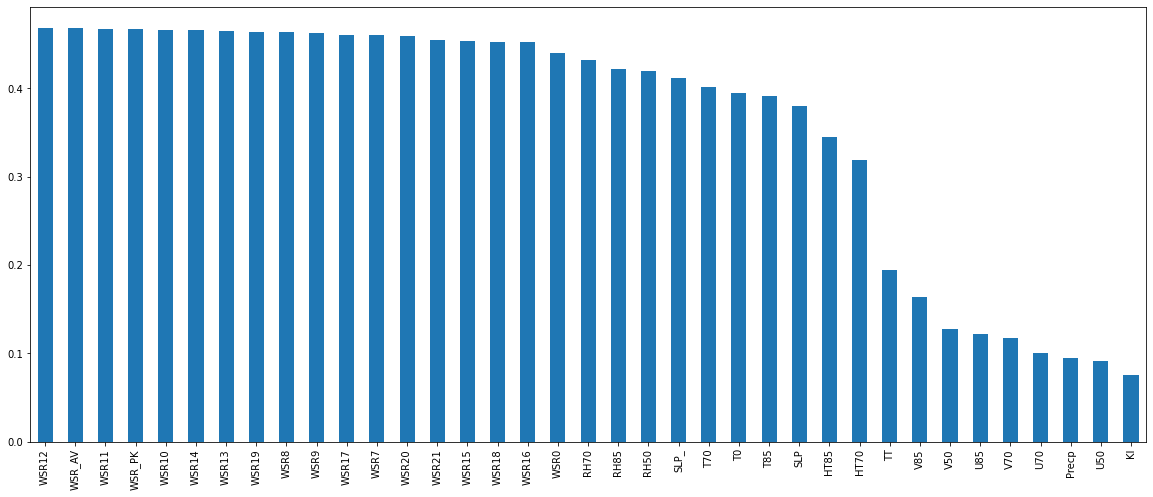

In [53]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [54]:
df=pd.concat([X, y], axis=1)

In [55]:
df.isna().sum()

WSR0      0
WSR7      0
WSR8      0
WSR9      0
WSR10     0
WSR11     0
WSR12     0
WSR13     0
WSR14     0
WSR15     0
WSR16     0
WSR17     0
WSR18     0
WSR19     0
WSR20     0
WSR21     0
WSR_PK    0
WSR_AV    0
T0        0
T85       0
RH85      0
U85       0
V85       0
HT85      0
T70       0
RH70      0
U70       0
V70       0
HT70      0
RH50      0
U50       0
V50       0
KI        0
TT        0
SLP       0
SLP_      0
Precp     0
Result    0
dtype: int64

In [56]:
df.to_csv("NEWDATA.CSV")

# **EDA**

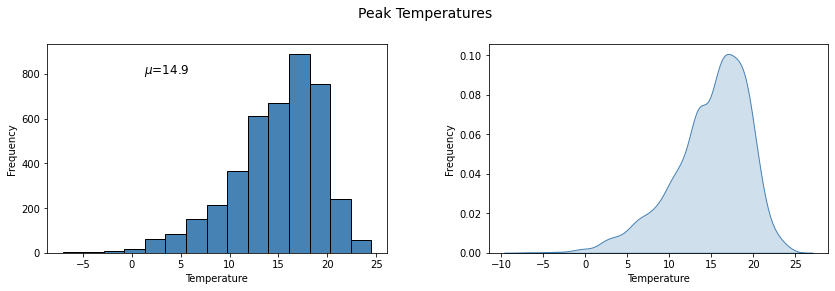

In [57]:
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak Temperatures", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['T85'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['T85'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)


# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['T85'], ax=ax1, shade=True, color='steelblue')

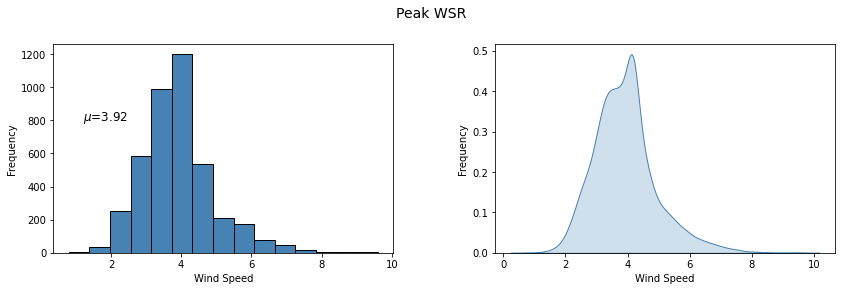

In [58]:
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak WSR", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['WSR_PK'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['WSR_PK'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)


# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Wind Speed")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['WSR_PK'], ax=ax1, shade=True, color='steelblue')

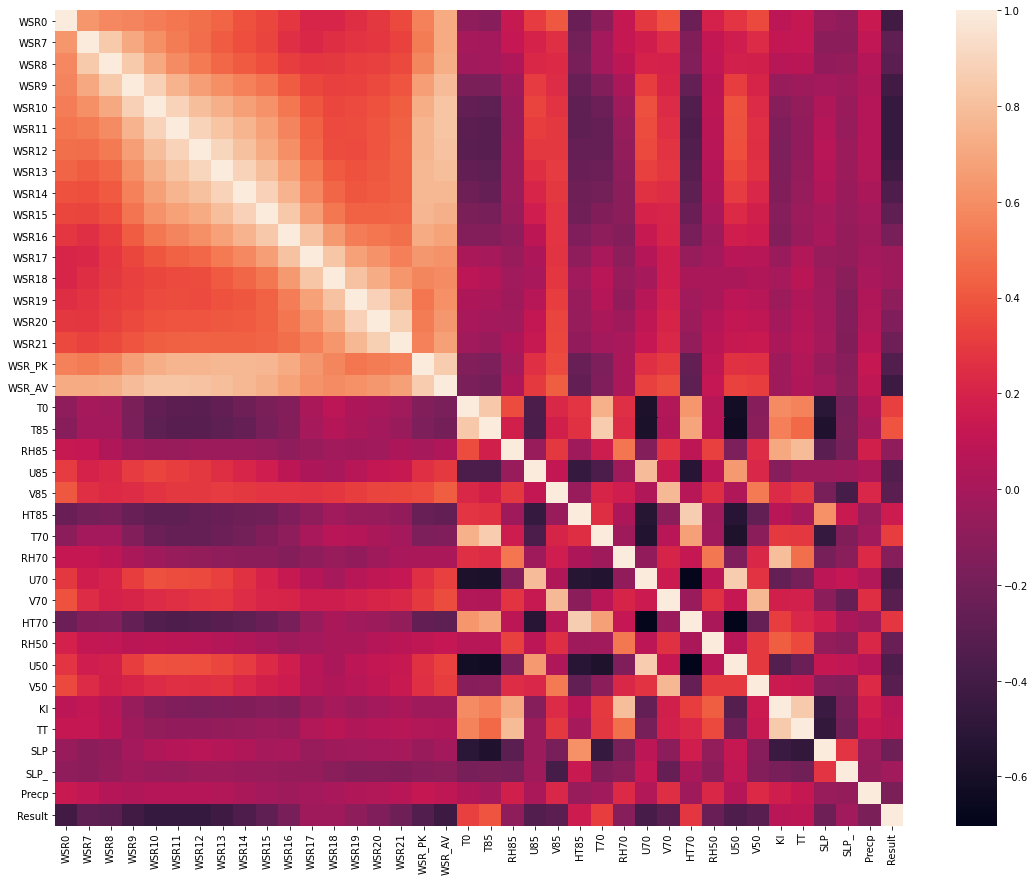

In [59]:
import seaborn as sns
#Using Pearson Correlation
corrmat = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(19,15)
sns.heatmap(corrmat)

In [60]:
df['ozone_label'] = df['Result'].apply(lambda value: 'Non Ozone Day' if value == 0 else 'Ozone Day')
df['ozone_label'] = pd.Categorical(df['ozone_label'], categories=['Non Ozone Day', 'Ozone Day'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


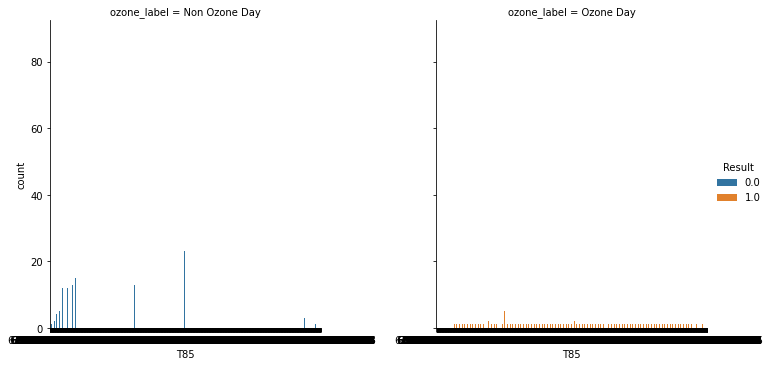

In [61]:
fc = sns.factorplot(x="T85", hue="Result", col="ozone_label", 
                    data=df, kind="count")

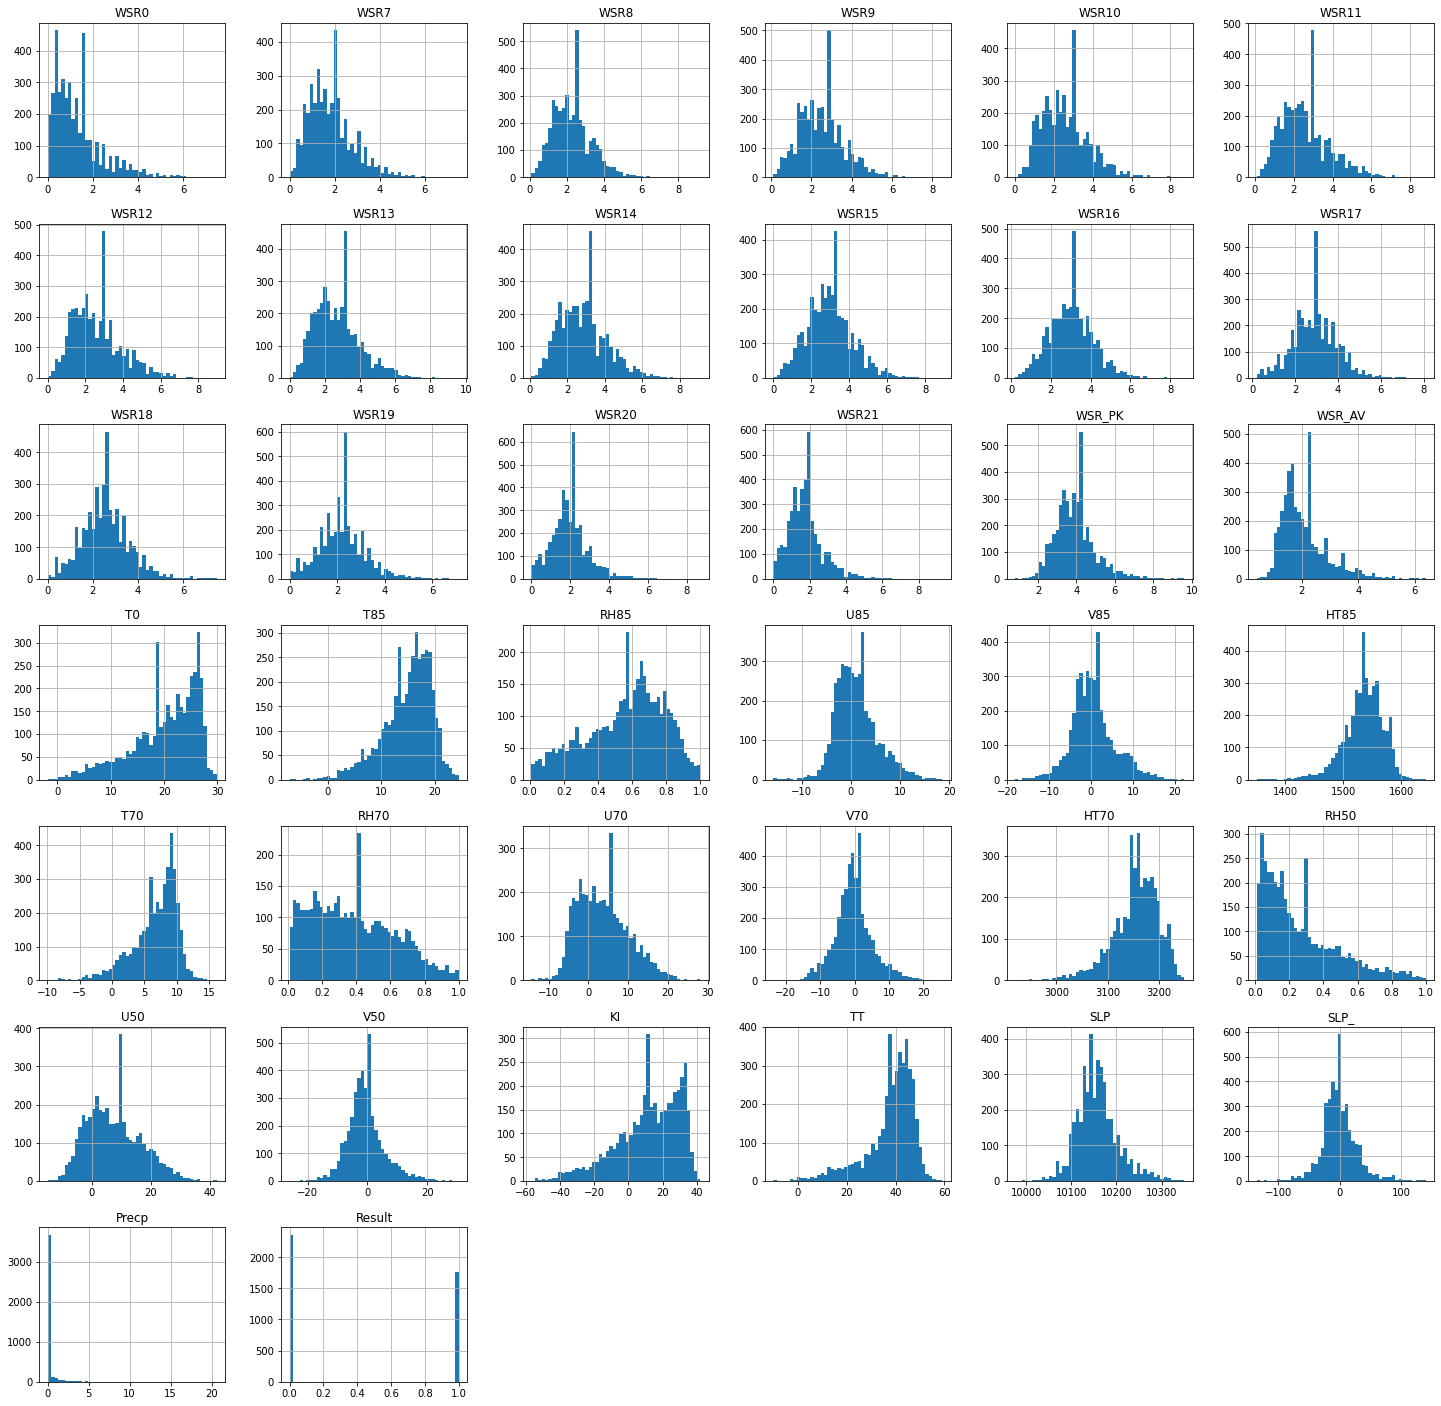

In [62]:
df.hist(figsize=(25,25),bins=50);

# **Applying Machine Learning**

In [63]:
dataset = pd.read_csv('/content/NEWDATA.CSV')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.01538479 -0.1912442  -0.93199334 ... -0.35717908  0.52665328
  -0.23046884]
 [-0.53748613  2.31629019  2.47453976 ... -0.24880155 -0.65419358
   0.58249345]
 [ 1.58509568 -0.77523228  0.57088891 ... -0.96886838 -0.31680876
  -0.1743692 ]
 ...
 [-0.34852975  0.31042889  0.21733781 ...  0.07633104  0.18926847
  -0.23046884]
 [ 0.45983075 -0.71493031 -1.15371242 ...  0.85104022  0.69534569
  -0.23046884]
 [ 0.56574801  0.48587663  1.09634386 ... -1.98284202  0.34228612
  -0.23046884]]
[[-8.46764518e-01  2.13054690e+00  3.87722986e+00 ... -2.48801550e-01
  -4.02804174e+00 -2.30468839e-01]
 [-1.71104933e+00  1.94480361e+00  4.70696759e-01 ... -5.73934139e-01
  -1.83504043e+00 -2.30468839e-01]
 [-4.19706141e-01 -5.50091250e-03 -3.30840442e-01 ... -7.90689198e-01
   1.37011532e+00 -5.62626348e-02]
 ...
 [-1.69494991e+00  4.58857308e-01 -9.31993342e-01 ... -2.30797461e+00
  -1.83504043e+00 -1.82078227e-01]
 [-4.62073044e-01  2.40916183e+00  2.77511621e+00 ... -1.44095438e+00
  -8.22885983

# **1.XGBClassifier**


In [66]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Confusion_matrix**

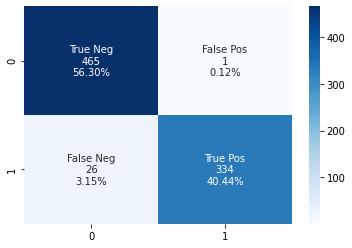

In [67]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       466
         1.0       1.00      0.93      0.96       360

    accuracy                           0.97       826
   macro avg       0.97      0.96      0.97       826
weighted avg       0.97      0.97      0.97       826



In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
a1=accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.21 %
Standard Deviation: 0.41 %


# **2.GaussianNB**

In [70]:


# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


In [72]:


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[359 107]
 [ 25 335]]


In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[359 107]
 [ 25 335]]
              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84       466
         1.0       0.76      0.93      0.84       360

    accuracy                           0.84       826
   macro avg       0.85      0.85      0.84       826
weighted avg       0.86      0.84      0.84       826



In [74]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
a2=accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.56 %
Standard Deviation: 1.94 %


# **3.LogisticRegression**

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


**Confusion_matrix**

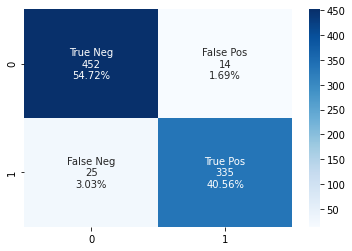

In [77]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[452  14]
 [ 25 335]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       466
         1.0       0.96      0.93      0.94       360

    accuracy                           0.95       826
   macro avg       0.95      0.95      0.95       826
weighted avg       0.95      0.95      0.95       826



In [79]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
a3=accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.67 %
Standard Deviation: 0.88 %


# **4.KNeighborsClassifier**

In [80]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [81]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


**Confusion_matrix**

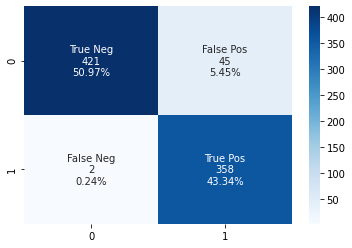

In [82]:


from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[421  45]
 [  2 358]]
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95       466
         1.0       0.89      0.99      0.94       360

    accuracy                           0.94       826
   macro avg       0.94      0.95      0.94       826
weighted avg       0.95      0.94      0.94       826



In [84]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
a4=accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.70 %
Standard Deviation: 1.15 %


# **5.SVM**

In [85]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [86]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


**Confusion_matrix**

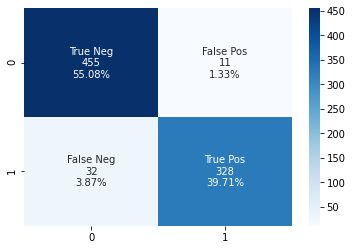

In [87]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       466
         1.0       0.97      0.91      0.94       360

    accuracy                           0.95       826
   macro avg       0.95      0.94      0.95       826
weighted avg       0.95      0.95      0.95       826



In [89]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
a5=accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.03 %
Standard Deviation: 1.14 %


# **6. Kernel Support Vector Machine**

In [90]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [91]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


**Confusion_matrix**

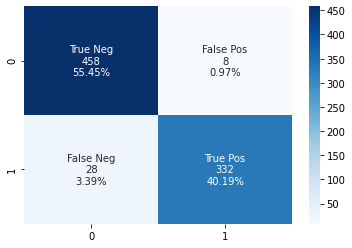

In [92]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       466
         1.0       0.98      0.92      0.95       360

    accuracy                           0.96       826
   macro avg       0.96      0.95      0.96       826
weighted avg       0.96      0.96      0.96       826



In [94]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
a6=accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.43 %
Standard Deviation: 0.78 %


# **7.DecisionTreeClassifier**

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [96]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


**Confusion_matrix**

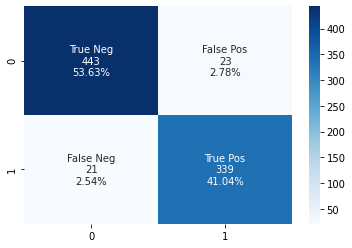

In [97]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       466
         1.0       0.94      0.94      0.94       360

    accuracy                           0.95       826
   macro avg       0.95      0.95      0.95       826
weighted avg       0.95      0.95      0.95       826



In [99]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
a7=accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.46 %
Standard Deviation: 1.39 %


# **8.RandomForestClassifier**

In [100]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [101]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


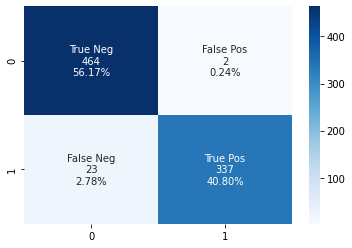

In [102]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       466
         1.0       0.99      0.94      0.96       360

    accuracy                           0.97       826
   macro avg       0.97      0.97      0.97       826
weighted avg       0.97      0.97      0.97       826



In [104]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
a8=accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.73 %
Standard Deviation: 0.80 %


###**Deep Learning**
Using ANN CLASSIFICATION

In [105]:
del df['Result']

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   WSR0         4128 non-null   float64 
 1   WSR7         4128 non-null   float64 
 2   WSR8         4128 non-null   float64 
 3   WSR9         4128 non-null   float64 
 4   WSR10        4128 non-null   float64 
 5   WSR11        4128 non-null   float64 
 6   WSR12        4128 non-null   float64 
 7   WSR13        4128 non-null   float64 
 8   WSR14        4128 non-null   float64 
 9   WSR15        4128 non-null   float64 
 10  WSR16        4128 non-null   float64 
 11  WSR17        4128 non-null   float64 
 12  WSR18        4128 non-null   float64 
 13  WSR19        4128 non-null   float64 
 14  WSR20        4128 non-null   float64 
 15  WSR21        4128 non-null   float64 
 16  WSR_PK       4128 non-null   float64 
 17  WSR_AV       4128 non-null   float64 
 18  T0           4128 non-null  

In [107]:
x=df.drop(labels=['ozone_label'], axis=1).values
dummies = pd.get_dummies(df['ozone_label']) # Classification
species = dummies.columns
y = dummies.values

In [108]:
x

array([[ 8.00000000e-01,  1.70000000e+00,  1.90000000e+00, ...,
         1.03300000e+04, -5.50000000e+01,  0.00000000e+00],
       [ 2.80000000e+00,  2.80000000e+00,  3.10000000e+00, ...,
         1.02750000e+04, -5.50000000e+01,  0.00000000e+00],
       [ 2.90000000e+00,  2.70000000e+00,  2.20000000e+00, ...,
         1.02350000e+04, -4.00000000e+01,  0.00000000e+00],
       ...,
       [ 7.00232244e-01,  4.01625710e-01,  8.00464488e-01, ...,
         1.01649884e+04, -1.49883878e+01,  0.00000000e+00],
       [ 1.30293936e+00,  1.55125532e+00,  2.59369256e+00, ...,
         1.01507563e+04, -2.92437234e+01,  0.00000000e+00],
       [ 4.00000000e-01,  1.62361122e+00,  2.14907415e+00, ...,
         1.01374537e+04, -1.38194391e+01,  0.00000000e+00]])

In [109]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [154]:
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

In [155]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

## Using Deep Neural Network

In [156]:
import tensorflow as tf
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization,Dropout
from keras import initializers
from tensorflow.keras.callbacks import EarlyStopping


In [157]:
model = Sequential()
model.add(Dense(100, kernel_initializer='random_normal', input_dim=x.shape[1], activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, kernel_initializer='random_normal', activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(100, kernel_initializer='random_normal', activation= "relu"))
model.add(Dense(50, kernel_initializer='random_normal', activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(y.shape[1], kernel_initializer='he_uniform', activation= "sigmoid"))

# Print model Summary
model.summary() 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 100)               3800      
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_15 (Batc (None, 100)               400       
_________________________________________________________________
dense_41 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_42 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_16 (Batc (None, 50)               

In [158]:
adagrad = keras.optimizers.Adagrad(learning_rate=0.1, initial_accumulator_value=0.1, epsilon=1e-7)
model.compile(loss="binary_crossentropy" , optimizer=adagrad, metrics=["acc"])

In [161]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=200, batch_size=20, verbose=2)

Epoch 1/200
117/117 - 0s - loss: 0.0264 - acc: 0.9922 - val_loss: 0.0862 - val_acc: 0.9755
Epoch 2/200
117/117 - 0s - loss: 0.0222 - acc: 0.9918 - val_loss: 0.0963 - val_acc: 0.9729
Epoch 3/200
117/117 - 0s - loss: 0.0338 - acc: 0.9914 - val_loss: 0.0903 - val_acc: 0.9755
Epoch 4/200
117/117 - 0s - loss: 0.0194 - acc: 0.9927 - val_loss: 0.0961 - val_acc: 0.9664
Epoch 5/200
117/117 - 0s - loss: 0.0198 - acc: 0.9944 - val_loss: 0.0841 - val_acc: 0.9767
Epoch 6/200
117/117 - 0s - loss: 0.0240 - acc: 0.9940 - val_loss: 0.0859 - val_acc: 0.9767
Epoch 7/200
117/117 - 0s - loss: 0.0264 - acc: 0.9914 - val_loss: 0.2150 - val_acc: 0.9251
Epoch 8/200
117/117 - 0s - loss: 0.0311 - acc: 0.9901 - val_loss: 0.0857 - val_acc: 0.9755
Epoch 9/200
117/117 - 0s - loss: 0.0333 - acc: 0.9931 - val_loss: 0.0821 - val_acc: 0.9780
Epoch 10/200
117/117 - 0s - loss: 0.0281 - acc: 0.9922 - val_loss: 0.0827 - val_acc: 0.9780
Epoch 11/200
117/117 - 0s - loss: 0.0190 - acc: 0.9927 - val_loss: 0.7443 - val_acc: 0.87

### Keras Model Visualization

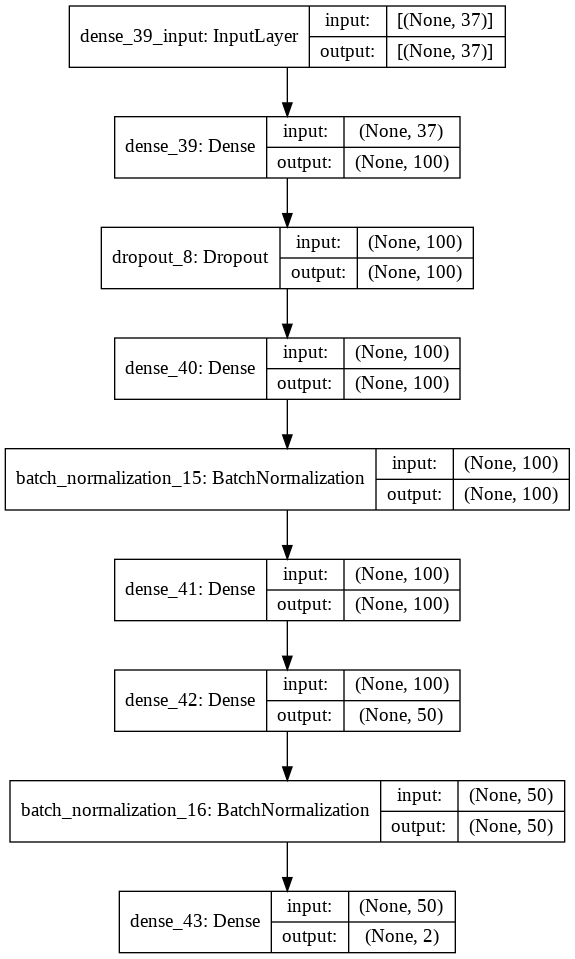

In [162]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

### Keras Training History Visualization

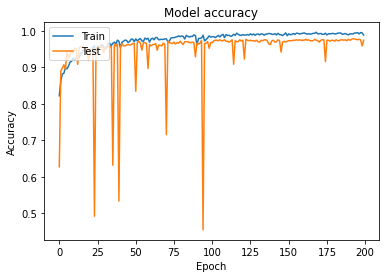

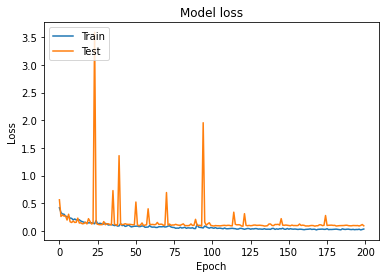

In [117]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Accuracy**

In [163]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9806201550387597


**Confusion_matrix**

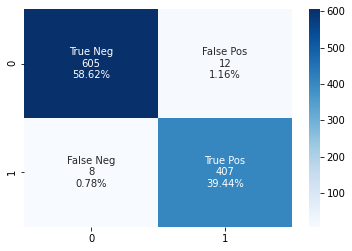

In [164]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_classes,predict_classes)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [165]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(expected_classes,predict_classes))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       617
           1       0.97      0.98      0.98       415

    accuracy                           0.98      1032
   macro avg       0.98      0.98      0.98      1032
weighted avg       0.98      0.98      0.98      1032



**Saving the best model**

In [182]:
from tensorflow.keras.models import load_model
model.save('Ozone_model.h5')

# **Results**

In [183]:
dff = pd.DataFrame({
    'Models': ['XGBClassifier', 'GaussianNB', 'LogisticRegression', 'KNeighborsClassifier', 'SVM', 'Kernel SVM','DecisionTreeClassifier','RandomForestClassifier'],
    'Accuracy%': [a1, a2, a3, a4, a5, a6,a7,a8],
    'Standard Deviation%': [0.41, 1.94,0.88, 1.15, 1.14, 0.78,1.39,0.80]
}).sort_values(by=['Accuracy%'], ascending=False)
dff

,Models,Accuracy%,Standard Deviation%
7,RandomForestClassifier,96.729104,0.80
0,XGBClassifier,96.214318,0.41
5,Kernel SVM,95.427172,0.78
6,DecisionTreeClassifier,94.458116,1.39
4,SVM,94.034423,1.14
2,LogisticRegression,93.670878,0.88
3,KNeighborsClassifier,92.702096,1.15
1,GaussianNB,82.557081,1.94


Text(0.5, 1.0, 'Cross_Val_Result')

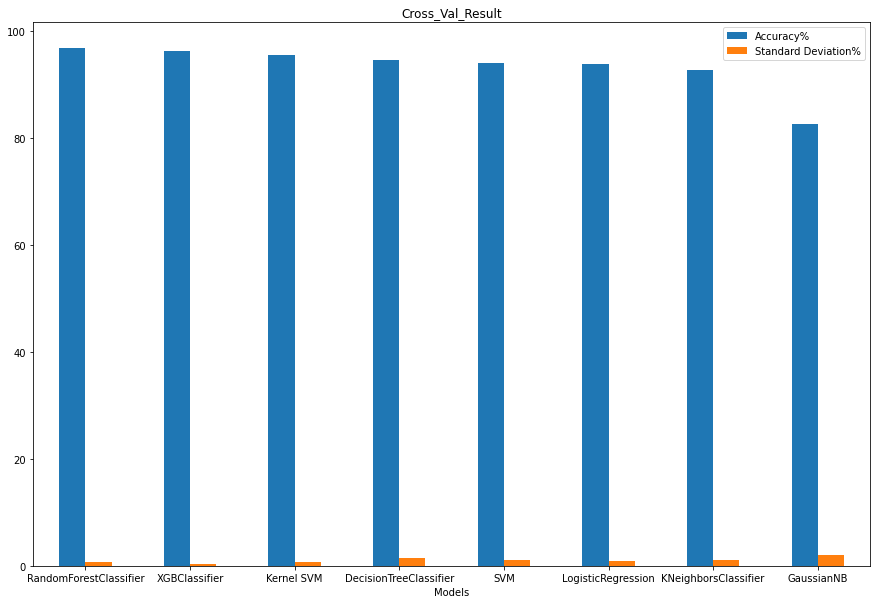

In [190]:
ax = dff.plot.bar( x='Models',rot=0 ,figsize=(15, 10))
plt.title('Cross_Val_Result')

In [174]:
df = pd.DataFrame({
    'Models': ['XGBClassifier', 'GaussianNB', 'LogisticRegression', 'KNeighborsClassifier', 'SVM', 'Kernel SVM','DecisionTreeClassifier','RandomForestClassifier','ANN'],
    'Accuracy%': [a1, a2, a3, a4, a5, a6,a7,a8,98.06]
}).sort_values(by=['Accuracy%'], ascending=False)
df

,Models,Accuracy%
8,ANN,98.060000
7,RandomForestClassifier,96.729104
0,XGBClassifier,96.214318
5,Kernel SVM,95.427172
6,DecisionTreeClassifier,94.458116
4,SVM,94.034423
2,LogisticRegression,93.670878
3,KNeighborsClassifier,92.702096
1,GaussianNB,82.557081


Text(0.5, 1.0, 'Final_Result')

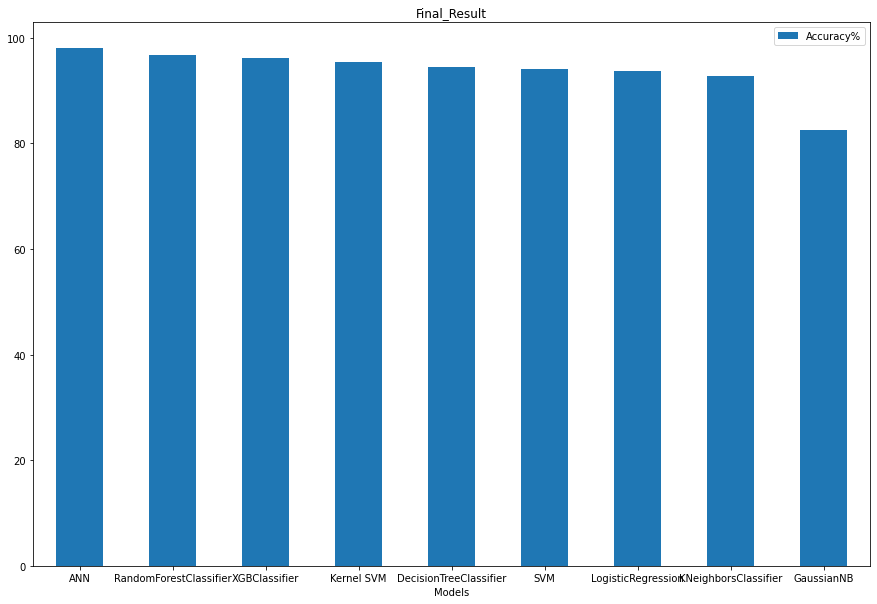

In [191]:
ax = df.plot.bar(x='Models', y='Accuracy%', rot=0 ,figsize=(15, 10))
plt.title('Final_Result')

# **Conclusion**: With ANN we could Achive a Accuracy of 98% and outperformed the other machine learning algorith I have used here. Hence we can use it for our pupose for detection of ozone depletion. 